Minimise ℓ1 Norm with ℓ2 Constraint
====================================

This example demonstrates the use of class [admm.bpdn.MinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.MinL1InL2Ball) to solve the problem

  $$\mathrm{argmin}_\mathbf{x} \| \mathbf{x} \|_1 \; \text{such that} \; \| D \mathbf{x} - \mathbf{s} \|_2 \leq \epsilon$$

where $D$ is the dictionary, $\mathbf{x}$ is the sparse representation, and $\mathbf{s}$ is the signal to be represented. In this example this problem is used to estimate the reference sparse representation that generated a signal from a noisy version of the signal.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco.admm import bpdn
from sporco import plot
plot.config_notebook_plotting()

Configure problem size, sparsity, and noise level.

In [2]:
N = 512      # Signal size
M = 4*N      # Dictionary size
L = 32       # Number of non-zero coefficients in generator
sigma = 0.5  # Noise level

Construct random dictionary, reference random sparse representation, and test signal consisting of the synthesis of the reference sparse representation with additive Gaussian noise.

In [3]:
# Construct random dictionary and random sparse coefficients
np.random.seed(12345)
D = np.random.randn(N, M)
x0 = np.zeros((M, 1))
si = np.random.permutation(list(range(0, M-1)))
x0[si[0:L]] = np.random.randn(L, 1)

# Construct reference and noisy signal
s0 = D.dot(x0)
s = s0 + sigma*np.random.randn(N,1)

Set [admm.bpdn.MinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.MinL1InL2Ball) solver class options. The value of $\epsilon$ is estimated from the difference between the noisy and reference signals.

In [4]:
epsilon = 1.1 * np.linalg.norm(s0 - s)
opt = bpdn.MinL1InL2Ball.Options({'Verbose': True, 'MaxMainIter': 500,
                                  'RelStopTol': 1e-3, 'rho': 1e0,
                                  'AutoRho': {'Enabled': False}})

Initialise and run [admm.bpdn.MinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.bpdn.html#sporco.admm.bpdn.MinL1InL2Ball) object

In [5]:
b = bpdn.MinL1InL2Ball(D, s, epsilon, opt)
x = b.solve()

print("MinL1InL2Ball solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s       
--------------------------------------------
   0  0.00e+00  1.15e+02  1.00e+00  4.95e+01
   1  1.72e+02  8.84e+01  3.84e-01  4.92e+01
   2  4.36e+01  3.86e+01  3.34e-01  4.56e+01
   3  7.04e+01  0.00e+00  4.07e-02  1.00e+00
   4  8.06e+01  0.00e+00  1.48e-02  1.00e+00
   5  9.89e+01  0.00e+00  1.51e-02  1.00e+00
   6  8.22e+01  0.00e+00  1.37e-02  1.00e+00
   7  6.56e+01  0.00e+00  1.27e-02  1.00e+00
   8  7.33e+01  0.00e+00  1.29e-02  1.00e+00
   9  6.98e+01  0.00e+00  1.22e-02  1.00e+00
  10  6.39e+01  0.00e+00  1.13e-02  1.00e+00
  11  6.70e+01  0.00e+00  1.08e-02  1.00e+00
  12  6.89e+01  0.00e+00  1.02e-02  1.00e+00
  13  6.67e+01  0.00e+00  9.85e-03  1.00e+00
  14  5.68e+01  2.78e-17  8.73e-03  1.00e+00
  15  5.22e+01  2.78e-17  8.30e-03  1.00e+00
  16  5.59e+01  2.78e-17  8.31e-03  1.00e+00
  17  5.31e+01  3.10e-17  7.63e-03  1.00e+00
  18  5.00e+01  6.21e-17  7.22e-03  1.00e+00
  19  4.89e+01  5.72e-17  6.98e-03  1.00e+00
  20  4.88

  54  2.78e+01  1.50e-04  1.33e-03  2.22e-01
  55  2.83e+01  7.57e-04  1.30e-03  2.13e-01
  56  2.84e+01  5.63e-04  1.27e-03  2.04e-01
  57  2.76e+01  7.34e-04  1.17e-03  1.95e-01
  58  2.74e+01  3.12e-04  1.12e-03  1.86e-01
  59  2.80e+01  4.33e-04  1.11e-03  1.77e-01
  60  2.79e+01  3.00e-04  1.06e-03  1.68e-01
  61  2.70e+01  6.17e-04  9.84e-04  1.60e-01
  62  2.70e+01  5.99e-04  9.46e-04  1.52e-01
  63  2.76e+01  6.42e-04  9.49e-04  1.45e-01
  64  2.73e+01  3.83e-04  8.98e-04  1.39e-01
  65  2.68e+01  3.13e-04  8.34e-04  1.33e-01
  66  2.71e+01  3.61e-04  8.31e-04  1.27e-01
  67  2.72e+01  5.09e-04  8.15e-04  1.20e-01
  68  2.67e+01  5.85e-04  7.62e-04  1.15e-01
  69  2.65e+01  6.06e-04  7.28e-04  1.09e-01
  70  2.68e+01  4.91e-04  7.27e-04  1.04e-01
  71  2.69e+01  4.20e-04  7.12e-04  1.00e-01
  72  2.66e+01  3.44e-04  6.74e-04  9.69e-02
  73  2.65e+01  4.26e-04  6.56e-04  9.33e-02
  74  2.66e+01  5.16e-04  6.52e-04  8.95e-02
  75  2.65e+01  5.22e-04  6.29e-04  8.60e-02
  76  2.64

 112  2.50e+01  1.50e-04  2.02e-04  3.64e-02
 113  2.51e+01  1.39e-04  1.97e-04  3.54e-02
 114  2.50e+01  1.50e-04  1.92e-04  3.44e-02
 115  2.50e+01  1.64e-04  1.86e-04  3.34e-02
 116  2.50e+01  1.71e-04  1.81e-04  3.24e-02
 117  2.50e+01  1.67e-04  1.78e-04  3.15e-02
 118  2.50e+01  1.52e-04  1.73e-04  3.06e-02
 119  2.49e+01  1.29e-04  1.68e-04  2.98e-02
 120  2.49e+01  1.10e-04  1.64e-04  2.90e-02
 121  2.49e+01  1.03e-04  1.61e-04  2.82e-02
 122  2.49e+01  1.10e-04  1.57e-04  2.74e-02
 123  2.49e+01  1.21e-04  1.52e-04  2.67e-02
 124  2.49e+01  1.25e-04  1.49e-04  2.60e-02
 125  2.49e+01  1.18e-04  1.46e-04  2.53e-02
 126  2.49e+01  1.06e-04  1.42e-04  2.46e-02
 127  2.49e+01  9.45e-05  1.39e-04  2.40e-02
 128  2.49e+01  8.74e-05  1.36e-04  2.35e-02
 129  2.49e+01  8.61e-05  1.33e-04  2.29e-02
 130  2.48e+01  8.66e-05  1.30e-04  2.24e-02
 131  2.48e+01  8.89e-05  1.27e-04  2.18e-02
 132  2.48e+01  9.23e-05  1.24e-04  2.13e-02
 133  2.48e+01  9.33e-05  1.21e-04  2.08e-02
 134  2.48


 181  2.46e+01  4.70e-05  3.94e-05  7.41e-03
 182  2.46e+01  4.68e-05  3.87e-05  7.26e-03
 183  2.46e+01  4.58e-05  3.78e-05  7.11e-03
 184  2.46e+01  4.44e-05  3.69e-05  6.96e-03
 185  2.46e+01  4.31e-05  3.62e-05  6.82e-03
 186  2.46e+01  4.24e-05  3.55e-05  6.68e-03
 187  2.46e+01  4.19e-05  3.47e-05  6.55e-03
 188  2.46e+01  4.15e-05  3.39e-05  6.42e-03
 189  2.46e+01  4.09e-05  3.32e-05  6.29e-03
 190  2.46e+01  4.03e-05  3.26e-05  6.16e-03
 191  2.46e+01  3.96e-05  3.19e-05  6.04e-03
 192  2.46e+01  3.88e-05  3.11e-05  5.92e-03
 193  2.45e+01  3.77e-05  3.05e-05  5.80e-03
 194  2.45e+01  3.66e-05  2.99e-05  5.68e-03
 195  2.45e+01  3.55e-05  2.93e-05  5.57e-03
 196  2.45e+01  3.46e-05  2.87e-05  5.46e-03
 197  2.45e+01  3.39e-05  2.81e-05  5.36e-03
 198  2.45e+01  3.36e-05  2.75e-05  5.25e-03
 199  2.45e+01  3.35e-05  2.70e-05  5.15e-03
 200  2.45e+01  3.31e-05  2.64e-05  5.05e-03
 201  2.45e+01  3.23e-05  2.59e-05  4.95e-03
 202  2.45e+01  3.11e-05  2.54e-05  4.85e-03
 203  2.4

 247  2.45e+01  1.25e-05  1.07e-05  2.08e-03
 248  2.45e+01  1.24e-05  1.06e-05  2.04e-03
 249  2.45e+01  1.24e-05  1.04e-05  2.00e-03
 250  2.45e+01  1.22e-05  1.02e-05  1.97e-03
 251  2.45e+01  1.19e-05  1.00e-05  1.93e-03
 252  2.45e+01  1.16e-05  9.82e-06  1.90e-03
 253  2.45e+01  1.13e-05  9.65e-06  1.86e-03
 254  2.45e+01  1.12e-05  9.48e-06  1.83e-03
 255  2.45e+01  1.11e-05  9.32e-06  1.80e-03
 256  2.45e+01  1.09e-05  9.15e-06  1.77e-03
 257  2.45e+01  1.07e-05  8.98e-06  1.73e-03
 258  2.45e+01  1.06e-05  8.83e-06  1.70e-03
 259  2.45e+01  1.04e-05  8.67e-06  1.67e-03
 260  2.45e+01  1.04e-05  8.52e-06  1.64e-03
 261  2.45e+01  1.03e-05  8.37e-06  1.61e-03
 262  2.45e+01  1.02e-05  8.22e-06  1.59e-03
 263  2.45e+01  9.95e-06  8.08e-06  1.56e-03
 264  2.45e+01  9.71e-06  7.94e-06  1.53e-03
 265  2.45e+01  9.47e-06  7.80e-06  1.50e-03
 266  2.45e+01  9.28e-06  7.66e-06  1.48e-03
 267  2.45e+01  9.15e-06  7.53e-06  1.45e-03
 268  2.45e+01  9.09e-06  7.40e-06  1.43e-03
 269  2.45

Plot comparison of reference and recovered representations.

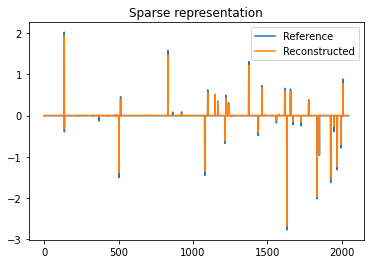

In [6]:
plot.plot(np.hstack((x0, x)), title='Sparse representation',
          lgnd=['Reference', 'Reconstructed'])

Plot functional value, residuals, and rho

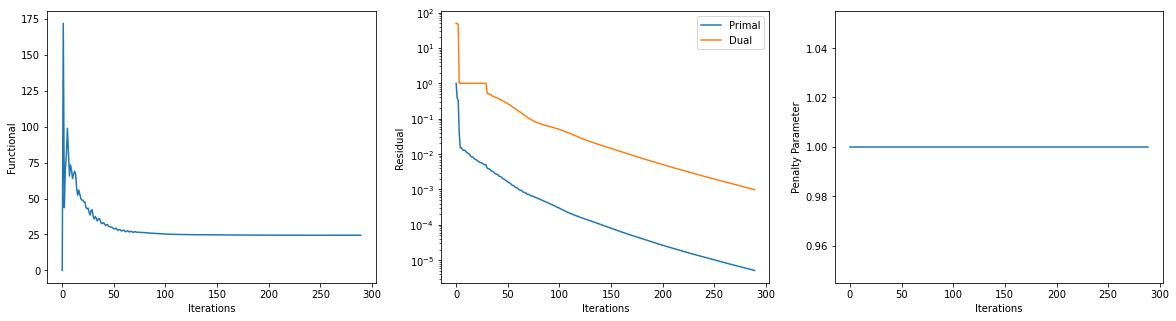

In [7]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()